In [206]:
!pip install opendatasets --upgrade --quiet

In [207]:
import opendatasets as od
od.version()

'0.1.22'

In [208]:
dataset_url = 'https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package'

In [209]:
od.download(dataset_url)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [210]:
data_dir = './weather-dataset-rattle-package'

In [211]:
import os
os.listdir(data_dir)

['weatherAUS.csv']

In [212]:
train_csv = './weather-dataset-rattle-package/weatherAUS.csv'

In [213]:
import pandas as pd

In [214]:
raw_df = pd.read_csv(train_csv)


In [215]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [216]:
raw_df.dropna(subset=['RainToday','RainTomorrow'] , inplace=True)

In [217]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [218]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [219]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [220]:
px.histogram(raw_df,x='Location' , title='Location vs rainy days',color='RainToday')

In [221]:
px.histogram(raw_df,x='Temp3pm' , title='temprature at 3 pm vs rain tommoro ', color='RainTomorrow')

In [222]:
raw_df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           503
Rainfall          679
Evaporation       355
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       545
Pressure3pm       548
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RainTomorrow        2
dtype: int64

In [223]:
px.histogram(raw_df, x='RainTomorrow' , color='RainToday')

In [224]:
px.scatter(raw_df.sample(2000), x='MaxTemp',y='MinTemp',color='RainToday')

sampling the data from large dataset

In [225]:
use_sample= False

In [226]:
sample_fraction=0.1


In [227]:
if use_sample :
  raw_df = raw_df.sample(frac=sample_fraction).copy()


In [228]:
from sklearn.model_selection import train_test_split

In [229]:
train_val_df,test_df = train_test_split(raw_df,test_size=0.2,random_state=42)
train_df, val_df = train_test_split(train_val_df,test_size=0.25, random_state=42)

In [230]:
print('train df - ',train_df.shape)
print('test df - ', test_df.shape)
print('val df - ', val_df.shape)

train df -  (84471, 23)
test df -  (28158, 23)
val df -  (28158, 23)


<Axes: title={'center': 'No of rowss per year'}, xlabel='Date', ylabel='count'>

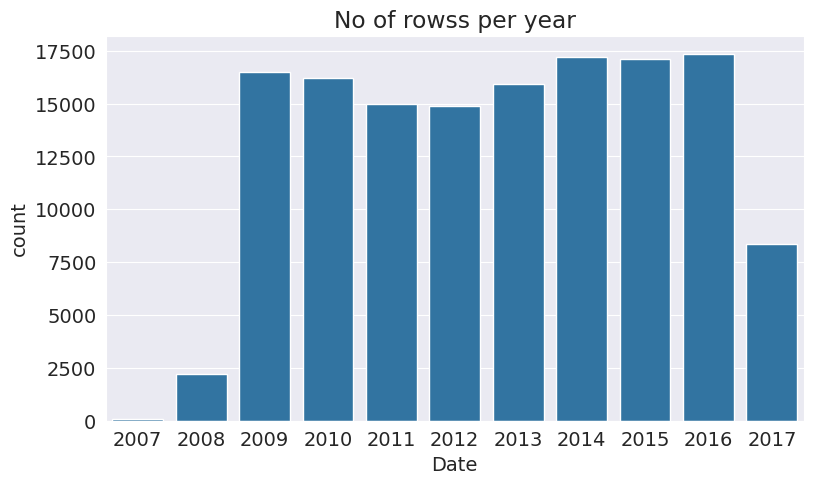

In [231]:
plt.title('No of rowss per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [232]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year<2015]
val_df = raw_df[year==2015]
test_df = raw_df[year>2015]

In [233]:
print('train df shape',train_df.shape)
print('test df shape',test_df.shape)
print('val df shape',val_df.shape)

train df shape (97988, 23)
test df shape (25710, 23)
val df shape (17089, 23)


In [234]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0          NaN   
2499    2016-01-02   Albury     20.9     33.6       0.4          NaN   
2500    2016-01-03   Albury     18.4     23.1       2.2          NaN   
2501    2016-01-04   Albury     17.3     23.7      15.6          NaN   
2502    2016-01-05   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2498         NaN         ENE           54.0        NaN  ...        46.0   
2499         NaN         SSE           50.0        SSE  ...        54.0   
2500         NaN         ENE           48.0        ESE  ...        62.0   
2501         NaN         SSE           39.0         SE  ...        74.0   
2502         NaN         ENE           31.0         SE  ...        92.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2498           17.0       1013.4       1009.2       7.0       3.0     26.1   
2499           30.0       1011.1       1008.4       8.0       8.0     24.8   
2500           67.0       1014.0       1014.8       8.0       8.0     21.8   
2501           65.0       1017.9       1016.5       8.0       8.0     19.2   
2502           63.0       1016.3       1013.9       8.0       8.0     17.2   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
2498       36.7         No            No  
2499       31.7         No           Yes  
2500       19.5        Yes           Yes  
2501       21.6        Yes           Yes  
2502       22.2        Yes            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[25710 rows x 23 columns]

In [235]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144548  2014-12-27    Uluru     16.9     33.2       0.0          NaN   
144549  2014-12-28    Uluru     15.1     36.8       0.0          NaN   
144550  2014-12-29    Uluru     17.3     37.8       0.0          NaN   
144551  2014-12-30    Uluru     20.1     38.5       0.0          NaN   
144552  2014-12-31    Uluru     22.5     39.6       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
144548       NaN         SSE           43.0        ESE  ...        22.0   
144549       NaN          NE           31.0        ENE  ...        16.0   
144550       NaN         ESE           39.0        ESE  ...        15.0   
144551       NaN         ESE           43.0        ESE  ...        22.0   
144552       NaN         WNW           76.0        ENE  ...        16.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
144548         13.0       1014.1       1009.8       NaN       NaN     23.7   
144549          8.0       1012.6       1007.6       NaN       NaN     28.9   
144550          8.0       1011.9       1008.0       NaN       NaN     29.7   
144551          9.0       1014.0       1009.2       NaN       NaN     29.8   
144552          9.0       1012.1       1006.2       NaN       NaN     30.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
144548     31.8         No            No  
144549     34.8         No            No  
144550     35.7         No            No  
144551     37.2         No            No  
144552     37.4         No            No  

[97988 rows x 23 columns]

In [236]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0          NaN   
2134    2015-01-02   Albury     15.5     39.6       0.0          NaN   
2135    2015-01-03   Albury     17.1     38.3       0.0          NaN   
2136    2015-01-04   Albury     26.0     33.1       0.0          NaN   
2137    2015-01-05   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0          NaN   
144914  2015-12-28    Uluru     18.0     36.4       0.0          NaN   
144915  2015-12-29    Uluru     17.5     37.1       0.0          NaN   
144916  2015-12-30    Uluru     20.0     38.9       0.0          NaN   
144917  2015-12-31    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2133         NaN         WSW           30.0        ESE  ...        45.0   
2134         NaN          NE           56.0        ESE  ...        45.0   
2135         NaN         NNE           48.0         NE  ...        35.0   
2136         NaN         NNE           41.0        ESE  ...        46.0   
2137         NaN           E           33.0        SSE  ...        60.0   
...          ...         ...            ...        ...  ...         ...   
144913       NaN           E           52.0        ESE  ...        23.0   
144914       NaN         ESE           54.0          E  ...        17.0   
144915       NaN           E           56.0          E  ...        12.0   
144916       NaN           E           59.0          E  ...        12.0   
144917       NaN          SE           56.0        ESE  ...        46.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2133           14.0       1013.5       1011.0       NaN       NaN     21.0   
2134           12.0       1016.0       1012.4       NaN       NaN     25.6   
2135           19.0       1017.9       1012.3       NaN       NaN     29.2   
2136           37.0       1013.6       1012.1       8.0       5.0     27.4   
2137           34.0       1017.4       1014.7       8.0       NaN     25.6   
...             ...          ...          ...       ...       ...      ...   
144913         12.0       1013.2       1010.1       NaN       NaN     24.3   
144914          7.0       1014.7       1010.9       NaN       NaN     26.7   
144915          7.0       1012.6       1007.5       NaN       NaN     28.1   
144916         12.0       1007.2       1002.6       NaN       1.0     31.3   
144917         18.0       1007.3       1003.7       NaN       NaN     25.8   

        Temp3pm  RainToday  RainTomorrow  
2133       32.7         No            No  
2134       38.2         No            No  
2135       37.0         No            No  
2136       30.9         No            No  
2137       32.5         No            No  
...         ...        ...           ...  
144913     33.0         No            No  
144914     35.0         No            No  
144915     34.7         No            No  
144916     38.4         No            No  
144917     35.8         No            No  

[17089 rows x 23 columns]

In [237]:
input_cols = list(train_df.columns)[1:-1]
target_col = "RainTomorrow"
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [238]:
train_input = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

In [239]:
train_input

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [240]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [241]:
val_input = val_df[input_cols].copy()
val_target = val_df[target_col].copy()


In [242]:
test_input = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [243]:
import numpy as np

In [244]:
numeric_cols = train_input.select_dtypes(include=np.number).columns.to_list()
numeric_cols
cat_cols = train_input.select_dtypes('object').columns.to_list()
cat_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [245]:
train_input[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [246]:
train_input[cat_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [247]:
from sklearn.impute import SimpleImputer

In [248]:
?SimpleImputer

In [249]:
imputer = SimpleImputer(strategy='mean')


In [250]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [251]:
train_input[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [252]:
train_input.shape

(97988, 21)

In [253]:
imputer.fit(raw_df[numeric_cols])
print(imputer.statistics_)

[  12.18482387   23.2351203     2.34997407    5.47251551    7.63053986
   39.97051989   13.99049609   18.63114078   68.82683277   51.44928835
 1017.65457715 1015.25796259    4.43116082    4.49925023   16.98706639
   21.69318269]


In [254]:
train_input[numeric_cols] = imputer.transform(train_input[numeric_cols])
val_input[numeric_cols] = imputer.transform(val_input[numeric_cols])
test_input[numeric_cols] = imputer.transform(test_input[numeric_cols])

In [255]:
train_input[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [256]:
train_input[numeric_cols]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6     5.472516   7.63054           44.0   
1           7.4     25.1       0.0     5.472516   7.63054           44.0   
2          12.9     25.7       0.0     5.472516   7.63054           46.0   
3           9.2     28.0       0.0     5.472516   7.63054           24.0   
4          17.5     32.3       1.0     5.472516   7.63054           41.0   
...         ...      ...       ...          ...       ...            ...   
144548     16.9     33.2       0.0     5.472516   7.63054           43.0   
144549     15.1     36.8       0.0     5.472516   7.63054           31.0   
144550     17.3     37.8       0.0     5.472516   7.63054           39.0   
144551     20.1     38.5       0.0     5.472516   7.63054           43.0   
144552     22.5     39.6       0.0     5.472516   7.63054           76.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
144548          24.0          26.0         22.0         13.0       1014.1   
144549          19.0          20.0         16.0          8.0       1012.6   
144550          26.0           9.0         15.0          8.0       1011.9   
144551          28.0          17.0         22.0          9.0       1014.0   
144552          30.0          13.0         16.0          9.0       1012.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0            1007.1  8.000000   4.49925     16.9     21.8  
1            1007.8  4.431161   4.49925     17.2     24.3  
2            1008.7  4.431161   2.00000     21.0     23.2  
3            1012.8  4.431161   4.49925     18.1     26.5  
4            1006.0  7.000000   8.00000     17.8     29.7  
...             ...       ...       ...      ...      ...  
144548       1009.8  4.431161   4.49925     23.7     31.8  
144549       1007.6  4.431161   4.49925     28.9     34.8  
144550       1008.0  4.431161   4.49925     29.7     35.7  
144551       1009.2  4.431161   4.49925     29.8     37.2  
144552       1006.2  4.431161   4.49925     30.1     37.4  

[97988 rows x 16 columns]

In [257]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[140787 rows x 23 columns]

In [258]:
from sklearn.preprocessing import MinMaxScaler

In [259]:
scaler = MinMaxScaler()

In [260]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [261]:
train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
test_input[numeric_cols] = scaler.transform(test_input[numeric_cols])
val_input[numeric_cols] = scaler.transform(val_input[numeric_cols])

In [262]:
train_input[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

In [263]:
raw_df[cat_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [264]:
from sklearn.preprocessing import OneHotEncoder

In [265]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse = False)

In [266]:
encoder.fit(raw_df[cat_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [267]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [268]:
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

In [269]:
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [270]:
train_input[encoded_cols] = encoder.transform(train_input[cat_cols])
val_input[encoded_cols] = encoder.transform(val_input[cat_cols])
test_input[encoded_cols] = encoder.transform(test_input[cat_cols])


<ipython-input-270-27112116f147>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-270-27112116f147>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-270-27112116f147>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-270-27112116f147>:1: PerformanceWarning:

In [271]:
print('train  shape - ',train_input.shape)
print('val shape - ',val_input.shape)
print('test shape - ',test_input.shape)
print('train target shape' , train_target.shape)
print('val target shape' , val_target.shape)
print('test target shape' , test_target.shape)

train  shape -  (97988, 123)
val shape -  (17089, 123)
test shape -  (25710, 123)
train target shape (97988,)
val target shape (17089,)
test target shape (25710,)


In [272]:
!pip install pyarrow --quiet

In [273]:
train_input.to_parquet('train_inputs.parquet')
val_input.to_parquet('val_input.parquet')
test_input.to_parquet('test_input.parquet')

In [274]:
%%time
pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')

CPU times: user 33.8 ms, sys: 3.98 ms, total: 37.8 ms
Wall time: 38.8 ms


In [275]:
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs= pd.read_parquet('val_input.parquet')
test_inputs = pd.read_parquet('test_input.parquet')

train_targets = pd.read_parquet('train_target.parquet')
val_targets = pd.read_parquet('val_target.parquet')
test_targets = pd.read_parquet('test_target.parquet')


In [276]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)


train_inputs: (97988, 123)
train_targets: (97988, 1)
val_inputs: (17089, 123)
val_targets: (17089, 1)
test_inputs: (25710, 123)
test_targets: (25710, 1)


In [277]:
val_targets

RainTomorrow
2133             No
2134             No
2135             No
2136             No
2137             No
...             ...
144913           No
144914           No
144915           No
144916           No
144917           No

[17089 rows x 1 columns]

In [278]:
val_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2133     Albury  0.469340  0.724008       0.0     0.037741  0.526244   
2134     Albury  0.566038  0.839319       0.0     0.037741  0.526244   
2135     Albury  0.603774  0.814745       0.0     0.037741  0.526244   
2136     Albury  0.813679  0.716446       0.0     0.037741  0.526244   
2137     Albury  0.648585  0.756144       0.0     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144913    Uluru  0.683962  0.746692       0.0     0.037741  0.526244   
144914    Uluru  0.625000  0.778828       0.0     0.037741  0.526244   
144915    Uluru  0.613208  0.792060       0.0     0.037741  0.526244   
144916    Uluru  0.672170  0.826087       0.0     0.037741  0.526244   
144917    Uluru  0.655660  0.797732       0.0     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SE  \
2133           WSW       0.186047        ESE          W  ...            0.0   
2134            NE       0.387597        ESE        ESE  ...            0.0   
2135           NNE       0.325581         NE          N  ...            0.0   
2136           NNE       0.271318        ESE          W  ...            0.0   
2137             E       0.209302        SSE         SE  ...            1.0   
...            ...            ...        ...        ...  ...            ...   
144913           E       0.356589        ESE          E  ...            0.0   
144914         ESE       0.372093          E        ESE  ...            0.0   
144915           E       0.387597          E         SE  ...            1.0   
144916           E       0.410853          E        SSE  ...            0.0   
144917          SE       0.387597        ESE          S  ...            0.0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
2133               0.0             0.0            0.0           1.0   
2134               0.0             0.0            0.0           0.0   
2135               0.0             0.0            0.0           0.0   
2136               0.0             0.0            0.0           1.0   
2137               0.0             0.0            0.0           0.0   
...                ...             ...            ...           ...   
144913             0.0             0.0            0.0           0.0   
144914             0.0             0.0            0.0           0.0   
144915             0.0             0.0            0.0           0.0   
144916             1.0             0.0            0.0           0.0   
144917             0.0             0.0            0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
2133               0.0             0.0             0.0           1.0   
2134               0.0             0.0             0.0           1.0   
2135               0.0             0.0             0.0           1.0   
2136               0.0             0.0             0.0           1.0   
2137               0.0             0.0             0.0           1.0   
...                ...             ...             ...           ...   
144913             0.0             0.0             0.0           1.0   
144914             0.0             0.0             0.0           1.0   
144915             0.0             0.0             0.0           1.0   
144916             0.0             0.0             0.0           1.0   
144917             0.0             0.0             0.0           1.0   

        RainToday_Yes  
2133              0.0  
2134              0.0  
2135              0.0  
2136              0.0  
2137              0.0  
...               ...  
144913            0.0  
144914            0.0  
144915            0.0  
144916            0.0  
144917            0.0  

[17089 rows x 123 columns]

In [279]:
val_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2133     Albury  0.469340  0.724008       0.0     0.037741  0.526244   
2134     Albury  0.566038  0.839319       0.0     0.037741  0.526244   
2135     Albury  0.603774  0.814745       0.0     0.037741  0.526244   
2136     Albury  0.813679  0.716446       0.0     0.037741  0.526244   
2137     Albury  0.648585  0.756144       0.0     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144913    Uluru  0.683962  0.746692       0.0     0.037741  0.526244   
144914    Uluru  0.625000  0.778828       0.0     0.037741  0.526244   
144915    Uluru  0.613208  0.792060       0.0     0.037741  0.526244   
144916    Uluru  0.672170  0.826087       0.0     0.037741  0.526244   
144917    Uluru  0.655660  0.797732       0.0     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SE  \
2133           WSW       0.186047        ESE          W  ...            0.0   
2134            NE       0.387597        ESE        ESE  ...            0.0   
2135           NNE       0.325581         NE          N  ...            0.0   
2136           NNE       0.271318        ESE          W  ...            0.0   
2137             E       0.209302        SSE         SE  ...            1.0   
...            ...            ...        ...        ...  ...            ...   
144913           E       0.356589        ESE          E  ...            0.0   
144914         ESE       0.372093          E        ESE  ...            0.0   
144915           E       0.387597          E         SE  ...            1.0   
144916           E       0.410853          E        SSE  ...            0.0   
144917          SE       0.387597        ESE          S  ...            0.0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
2133               0.0             0.0            0.0           1.0   
2134               0.0             0.0            0.0           0.0   
2135               0.0             0.0            0.0           0.0   
2136               0.0             0.0            0.0           1.0   
2137               0.0             0.0            0.0           0.0   
...                ...             ...            ...           ...   
144913             0.0             0.0            0.0           0.0   
144914             0.0             0.0            0.0           0.0   
144915             0.0             0.0            0.0           0.0   
144916             1.0             0.0            0.0           0.0   
144917             0.0             0.0            0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
2133               0.0             0.0             0.0           1.0   
2134               0.0             0.0             0.0           1.0   
2135               0.0             0.0             0.0           1.0   
2136               0.0             0.0             0.0           1.0   
2137               0.0             0.0             0.0           1.0   
...                ...             ...             ...           ...   
144913             0.0             0.0             0.0           1.0   
144914             0.0             0.0             0.0           1.0   
144915             0.0             0.0             0.0           1.0   
144916             0.0             0.0             0.0           1.0   
144917             0.0             0.0             0.0           1.0   

        RainToday_Yes  
2133              0.0  
2134              0.0  
2135              0.0  
2136              0.0  
2137              0.0  
...               ...  
144913            0.0  
144914            0.0  
144915            0.0  
144916            0.0  
144917            0.0  

[17089 rows x 123 columns]

In [280]:
val_targets

RainTomorrow
2133             No
2134             No
2135             No
2136             No
2137             No
...             ...
144913           No
144914           No
144915           No
144916           No
144917           No

[17089 rows x 1 columns]

In [281]:
from sklearn.linear_model import LogisticRegression

In [282]:
?LogisticRegression

In [283]:
model = LogisticRegression(solver='liblinear')


In [284]:
model.fit(train_inputs[numeric_cols+encoded_cols], train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(solver='liblinear')

In [285]:
print(numeric_cols+encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [286]:
print(model.coef_.tolist())

[[0.8986324151652026, -2.8799288484272725, 3.1627783941533836, 0.854233199097419, -1.6713967645743446, 6.764401997617562, -0.9423193916231418, -1.4284332004350349, 0.32288705993860534, 5.995309618290915, 5.463842155596162, -9.17680276828724, -0.16230118601099724, 1.2876575875289866, 0.4747071394851873, 2.021436091461751, 0.6016503155225178, -0.5524816082098337, 0.4781437731763531, 0.007665268046942364, 0.34681451580237477, -0.35227817340007966, 0.179711399916397, 0.44048778217353635, -0.01398114695470229, 0.02894542200290951, 0.25814954936639495, -0.02120462546599252, -0.042796507118596186, -0.4831421250609206, -0.13756199126704258, -0.5760603459151452, -0.7875267102260608, -0.2554043193119793, -0.32888557652985945, -0.5690061685416732, 0.08183012548576335, 0.01337885424500912, 0.06412739003123773, -0.902055123317936, -0.44432923536376756, 0.008522707040877443, -0.46061421444037337, -0.46551869427571413, -0.06950053405236756, 0.19116044505301996, 0.45047653558120854, 0.6081202596542495

In [287]:
print(model.intercept_)

[-2.44956109]


In [288]:
pd.DataFrame({
    'features':numeric_cols+encoded_cols,
    'coef':model.coef_[0].tolist(),

})

features      coef
0           MinTemp  0.898632
1           MaxTemp -2.879929
2          Rainfall  3.162778
3       Evaporation  0.854233
4          Sunshine -1.671397
..              ...       ...
113  WindDir3pm_WNW -0.033499
114  WindDir3pm_WSW -0.275977
115  WindDir3pm_nan  0.074934
116    RainToday_No -1.473521
117   RainToday_Yes -0.976040

[118 rows x 2 columns]

In [289]:
X_train = train_inputs[numeric_cols+encoded_cols]
X_val = val_inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

In [290]:
train_pred = model.predict(X_train)


In [291]:
train_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [292]:
train_targets

RainTomorrow
0                No
1                No
2                No
3                No
4                No
...             ...
144548           No
144549           No
144550           No
144551           No
144552           No

[97988 rows x 1 columns]

In [293]:
train_prob = model.predict_proba(X_train)
train_prob

array([[0.94401311, 0.05598689],
       [0.94074304, 0.05925696],
       [0.96093735, 0.03906265],
       ...,
       [0.98749147, 0.01250853],
       [0.98334725, 0.01665275],
       [0.87453712, 0.12546288]])

In [294]:
from sklearn.metrics import  accuracy_score

In [295]:
accuracy_score(train_targets,train_pred)

0.8519206433440829

In [296]:
from sklearn.metrics import confusion_matrix

In [297]:
confusion_matrix(train_targets,train_pred , normalize = 'true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [298]:
def predict_plot(input,target,name=''):
    pred = model.predict(input)
    accuracy = accuracy_score(target,pred)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    confusion_M = confusion_matrix(target,pred,normalize='true')
    plt.figure()
    sns.heatmap(confusion_M,annot=True)
    plt.xlabel('predictions ')
    plt.ylabel('targets')
    plt.title('{} Confusion Matrix'.format(name));
    return pred

Accuracy: 85.19%


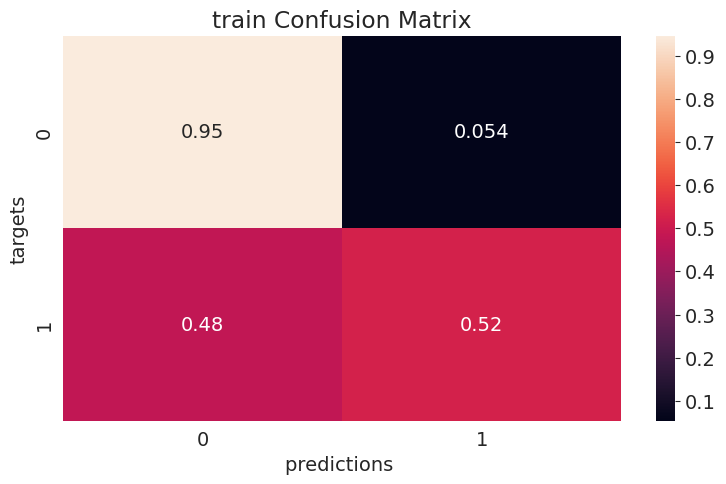

In [299]:
train_pred = predict_plot(X_train,train_targets,'train')

Accuracy: 85.40%


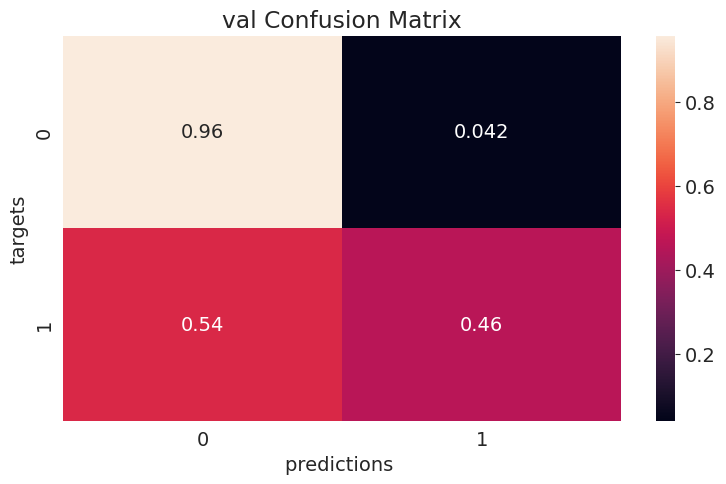

In [300]:
val_pred = predict_plot(X_val,val_targets,'val')

In [301]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [302]:
def all_no(inputs):
    return np.full(len(inputs), "No")

Accuracy: 84.20%


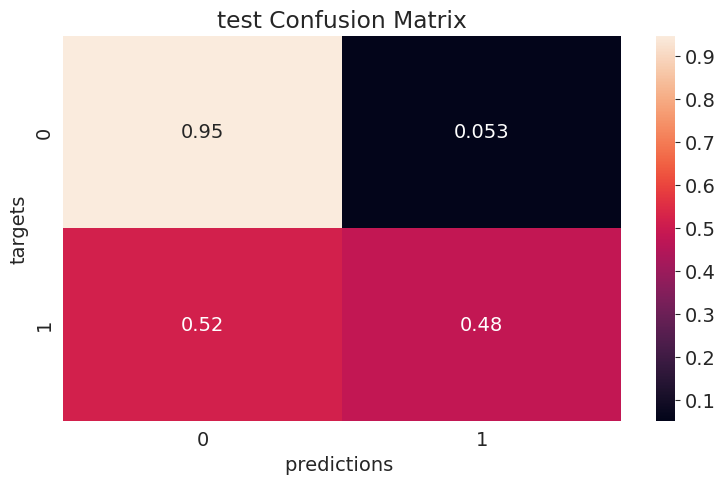

In [303]:
test_pred = predict_plot(X_test,test_targets,'test')

In [304]:
accuracy_score(test_target,all_no(test_target))

0.7734344612991054

In [305]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [306]:
new_input_df = pd.DataFrame([new_input])

In [308]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[cat_cols])

<ipython-input-308-12e5d4d141d1>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-308-12e5d4d141d1>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-308-12e5d4d141d1>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-308-12e5d4d141d1>:3: PerformanceWarning:

In [309]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.218105  0.104316  0.000074       0.0002  0.036293      -0.043747   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_SE  \
0      0.000769      0.002642       0.0089       0.0058  ...            0.0   

   WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0             0.0             0.0            0.0           0.0   

   WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  RainToday_Yes  
0             0.0             0.0             0.0           0.0            1.0  

[1 rows x 118 columns]

In [310]:
prediction = model.predict(X_new_input)[0]
prediction

'Yes'

In [311]:
prob = model.predict_proba(X_new_input)[0]

In [312]:
import joblib

In [314]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': cat_cols,
    'encoded_cols': encoded_cols

}

In [315]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [316]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [317]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8420070011668611

Putting all this together

**DATA PREPROCESSING**

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Download the dataset
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Create training, validation and test sets
year = pd.to_datetime(raw_df.Date).dt.year
train_df, val_df, test_df = raw_df[year < 2015], raw_df[year == 2015], raw_df[year > 2015]

# Create inputs and targets
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

# Impute missing numerical values
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

# Scale numeric features
scaler = MinMaxScaler().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

# Save processed data to disk
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

# Load processed data from disk
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')
train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

**Model Training and Evaluation**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy: 85.40%
Accuracy: 84.20%


NameError: name 'categorical_cols' is not defined

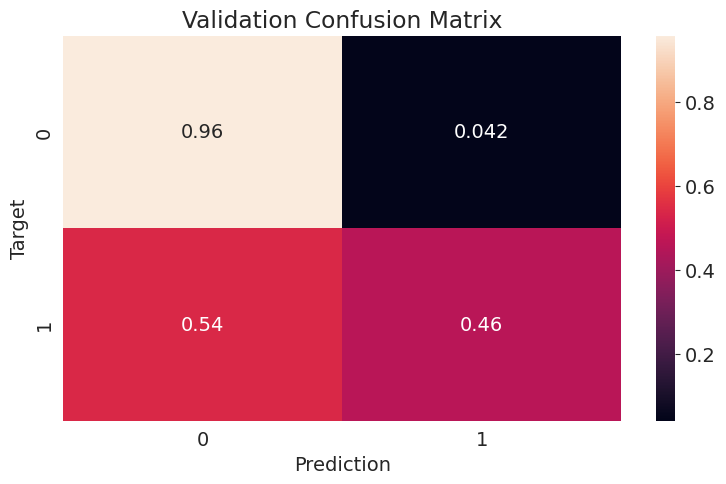

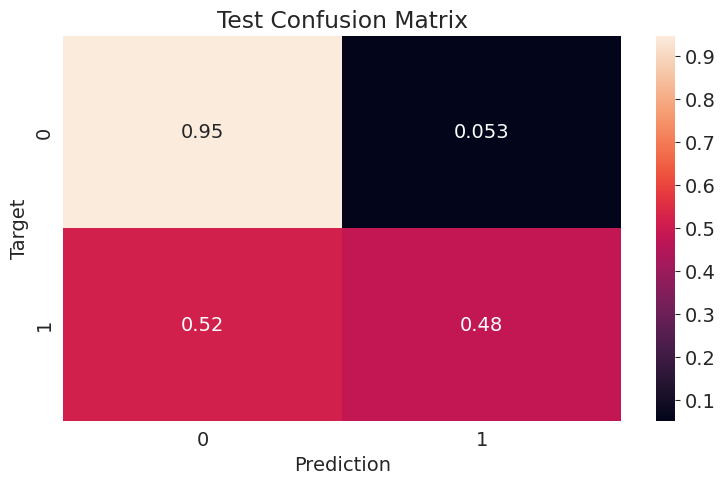

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Select the columns to be used for training/prediction
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Create and train the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

# Generate predictions and probabilities
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
accuracy_score(train_targets, train_preds)

# Helper function to predict, compute accuracy & plot confustion matrix
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return preds

# Evaluate on validation and test set
val_preds = predict_and_plot(X_val, val_targets, 'Validation')
test_preds = predict_and_plot(X_test, test_targets, 'Test')

# Save the trained model & load it back
aussie_rain = {'model': model, 'imputer': imputer, 'scaler': scaler, 'encoder': encoder,
               'input_cols': input_cols, 'target_col': target_col, 'numeric_cols': numeric_cols,
               'categorical_cols': categorical_cols, 'encoded_cols': encoded_cols}
joblib.dump(aussie_rain, 'aussie_rain.joblib')
aussie_rain2 = joblib.load('aussie_rain.joblib')

## **PREDICTING ON SINGLE INPUT**

In [ ]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

predict_input(new_input)